## Initial Analysis for new loss funcion

##### Contents of analysis
- Compare loss curve with various settings 
- Apply clustering (development is necessary)
   - normal MNIST test data
   - rotated MNIST test data
- Supervised trainng with latent representation  
    - Train latent representation with Train data and Test accuracy
    - Evaluate prediction of each digit image with various rotation

##### Dataset
- MNIST

##### Note
- 08/23  
    For rotation function issue (degree-->radian), change model

In [1]:
import os
import sys
import glob
import math
import random
import statistics
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from pylab import *
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [2]:
### F score metrics
%reload_ext autoreload
%autoreload 2
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as prf_support
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
def compute_tsne(data,n_components=2):
    features = TSNE(n_components=n_components, random_state=0).fit_transform(data)
    return features

In [4]:
def compute_aggl(data, n_cluster=10):
    method = AgglomerativeClustering(n_clusters=n_cluster)
    labels = method.fit_predict(data)
    return labels

In [9]:
def get_rand_colors(n=10, cmap_name='jet', _seed = 654321):
    cmap = cm.get_cmap(cmap_name, n)
    colors = []
    for idx, i in enumerate(range(cmap.N)):
        rgb = cmap(i)[:3]
        colors += [matplotlib.colors.rgb2hex(rgb)]
        # shuffle
        seed(_seed)
        shuffle(colors)
    return colors

MNIST Data if necessay

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

### Loss comparison

In [4]:
logdir = "/home/tkurihana/scratch-midway2/clouds/metrics/"
loss_list = glob.glob(logdir+'/*rotate.txt')
loss_list.sort()

In [5]:
loss_list

['/home/tkurihana/scratch-midway2/clouds/metrics/norotate.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/rotate.txt']

In [6]:
def load_txt(ifile):
    data = []
    with open(ifile, 'r') as f:
        for line in f.readlines():
            data.append(float(line.split("\n")[0]))
    return data

In [7]:
loss_curve_list = []
for ifile in loss_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

##### Plot (Updated bug-fixed version)
$$ \lambda = 0.1, \delta degree = 2 ^\circ $$

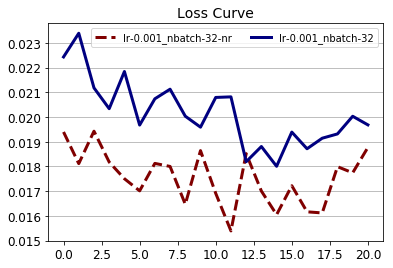

In [11]:
name_list = [
    "lr-0.001_nbatch-32-nr",
    "lr-0.001_nbatch-32",
]
ls_list = [
    '--', '-', '--','-'
]

colors = get_rand_colors(n=2)

plt.figure()
x = np.array([ i for i in range(loss_array[0].shape[0])])
ic = 0
for idx, loss in enumerate(loss_array):
    #if idx >= 2:
    #    ic = 1
    plt.plot(x, loss, color=colors[idx], linestyle=ls_list[idx], linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.grid()
plt.legend(ncol=2)
plt.show()

Plot: fix the following variables $\lambda = 1.0$, $dangle = 2$

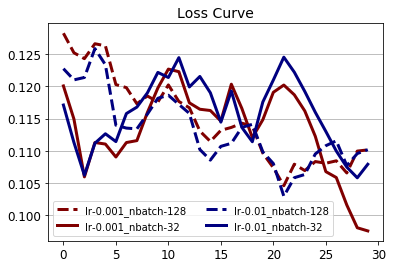

In [29]:
name_list = [
    "lr-0.001_nbatch-128",
    "lr-0.001_nbatch-32",
    "lr-0.01_nbatch-128",
    "lr-0.01_nbatch-32",
]
ls_list = [
    '--', '-', '--','-'
]

colors = get_rand_colors(n=2)

plt.figure()
x = np.array([ i for i in range(loss_array[0].shape[0])])
ic = 0
for idx, loss in enumerate(loss_array):
    if idx >= 2:
        ic = 1
    plt.plot(x, loss, color=colors[ic], linestyle=ls_list[idx], linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.grid()
plt.legend(ncol=2)
plt.show()

-------------
Plot:   
Change the following variables $\lambda = {0.1, 0.5, 1.0}$,   
But fix $dangle = 2$, $learning rate = 0.001$ and $batch = 32$

In [143]:
loss_36_list = glob.glob(logdir+'/loss_new_nepoch-36*.txt')
loss_36_list.sort(reverse=True)

In [144]:
loss_36_list

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda1.0_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda0.5_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_new_nepoch-36_lr-0.001_nbatch-32_lambda0.1_dangle2.txt']

In [34]:
loss_filelist = loss_31_list + [loss_30_list[1]]

In [35]:
loss_filelist

['/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-31_lr-0.001_nbatch-32_lambda0.1_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-31_lr-0.001_nbatch-32_lambda0.5_dangle2.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics/log/loss_nepoch-30_lr-0.001_nbatch-32_lambda1.0_dangle2.txt']

In [145]:
loss_curve_list = []
for ifile in loss_36_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

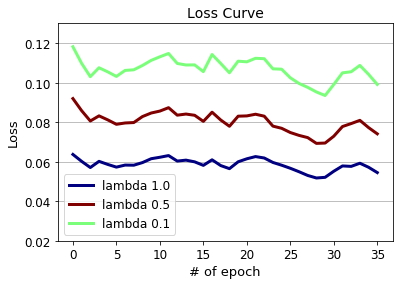

In [150]:
name_list = [
    "lambda 1.0",
    "lambda 0.5",
    "lambda 0.1",
]

colors = get_rand_colors(n=3)

plt.figure()
for idx, loss in enumerate(loss_array[::-1]):
    x = np.array([ i for i in range(len(loss))])
    plt.plot(x, loss, color=colors[idx],  linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.02,0.13)
plt.ylabel("Loss", fontsize=13)
plt.xlabel("# of epoch", fontsize=13)
plt.gca().yaxis.grid()
plt.legend(ncol=1, loc='lower left', fontsize=12)
plt.show()

Compare with original L2 model

In [35]:
ofile = glob.glob(logdir+'/log/loss_original_nepoch-16*.txt')

In [36]:
loss_comp_list = [loss_list[0]]+ ofile 

In [37]:
loss_comp_list

['/home/tkurihana/scratch-midway2/clouds/metrics/norotate.txt',
 '/home/tkurihana/scratch-midway2/clouds/metrics//log/loss_original_nepoch-16_lr-0.0001_nbatch-32.txt']

In [38]:
loss_curve_list = []
for ifile in loss_comp_list:
    loss_curve_list.append(load_txt(ifile))
loss_array = np.asarray(loss_curve_list)

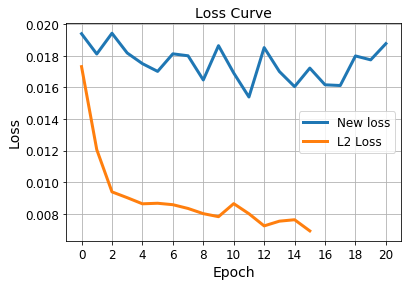

In [77]:
name_list = [
     "New loss",
     "L2 Loss"
]

#colors = get_rand_colors(n=2)

plt.figure()
for idx, loss in enumerate(loss_array):
    x = np.array([ i for i in range(len(loss))])
    plt.plot(x, loss, linewidth=3, label=name_list[idx] )
plt.title("Loss Curve", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([i for i in range(0,21,2)])
#plt.ylim(0.02,0.13)
plt.gca().yaxis.grid()
plt.gca().xaxis.grid()
#plt.legend(ncol=1, loc='lower right', fontsize=12)
plt.legend(ncol=1, fontsize=12)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.show()

-------------------------------
### Clustering  

Load data

In [70]:
### load mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz


In [83]:
# data
x_test = mnist.test.images
n = x_test.shape[0]
x_test = x_test.reshape(n, 28,28,1)

# labels
y_test = mnist.test.labels

Load model

In [76]:
def load_model(model_dir='.', step=30):
    encoder_def = model_dir+'/encoder.json'
    encoder_weight = model_dir+'/encoder-'+str(step)+'.h5'
    with open(encoder_def, "r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(encoder_weight)
    return encoder

In [151]:
new_model = load_model('./output_model/61881099', step=5) 

In [152]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        1450      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 10)        0         
__________

In [166]:
omodel = load_model('./output_model/original2', step=5)  # original model
nmodel = load_model('./output_model/61881099', step=35) # new l2 loss modle

In [86]:
omodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 8)         0         
__________

In [84]:
olatents = omodel.predict(x_test)
nlatents = nmodel.predict(x_test)

In [90]:
olabels = compute_aggl( np.mean(olatents, axis=(1,2)), n_cluster=10)
nlabels = compute_aggl( np.mean(nlatents, axis=(1,2)), n_cluster=10)

###### Plot with tsne

- original model

In [ ]:
features = compute_tsne(np.mean(olatents, axis=(1,2)), n_components=2)

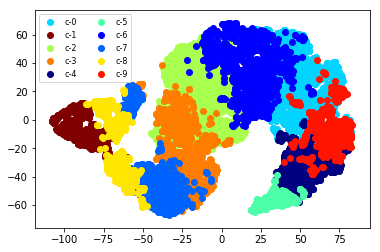

In [118]:
colors = get_rand_colors(n=10, _seed=102)                        
for icluster in range(10):
    idx = np.argwhere(olabels == icluster)
    plt.scatter(features[idx, 0], features[idx, 1], color=colors[icluster], label='c-'+str(icluster))
plt.legend(ncol=2 ,fontsize=8)
plt.show()

- new loss

In [110]:
nfeatures = compute_tsne(np.mean(nlatents, axis=(1,2)), n_components=2)

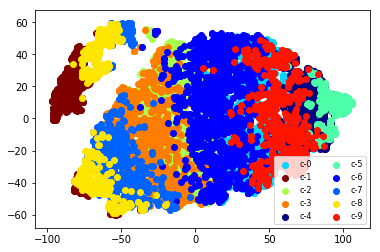

In [119]:
colors = get_rand_colors(n=10, _seed=102)                        
for icluster in range(10):
    idx = np.argwhere(olabels == icluster)
    plt.scatter(nfeatures[idx, 0], nfeatures[idx, 1], color=colors[icluster], label='c-'+str(icluster))
plt.legend(ncol=2 ,fontsize=8)
plt.show()

-------------
#### Distribution of each cluster

 Original model

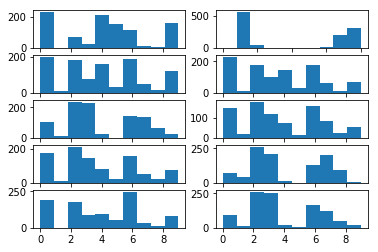

In [136]:
fig = plt.figure()
for icluster in range(10):
    ax = plt.subplot(5,2,icluster+1)
    true_idx = np.where(y_test == icluster)
    plt.hist(olabels[true_idx])

New L2 model

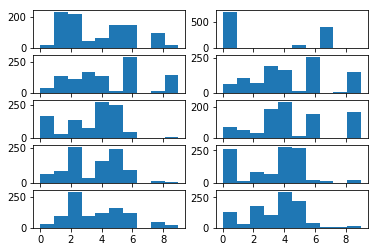

In [137]:
fig = plt.figure()
for icluster in range(10):
    ax = plt.subplot(5,2,icluster+1)
    true_idx = np.where(y_test == icluster)
    plt.hist(nlabels[true_idx])

-------------------
## Supervised training with latent space

### 1. Trained AE + CNN Performance Score with rotated/non-rotated test image
Build simple classifier (Conv+CNN) which inputs rotated MNIST data and outputs the 10-classes. Which model can dicriminate rotated image more accurately?

##### Goal
Latent representation learing randomly rotated images can prevent degradation of performance? If so performance is fine? 

##### Scores
- Accuracy
- Precision
- Recall
- F1
- TP/FP/TN/FN

###### Note
Note that for “micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F, while “weighted” averaging may produce an F-score that is not between precision and recall.

###### Note2
When I use precision and recall with `micro` option, these values are equal with accuracy. But set to `weighted` - focusing on each cluster and take weighted coef based on number of each cluster entry, the result will be different.

In [12]:
# additional functions for this analysis
from classifier import rotate_fn
from classifier_2 import input_fn

###### Common Functions

In [13]:
def load_cnn(model_dir='.', step=30):
    cnn_def = model_dir+'/cnn.json'
    cnn_weight = model_dir+'/cnn-'+str(step)+'.h5'
    with open(cnn_def, "r") as f:
        cnn = tf.keras.models.model_from_json(f.read())
    cnn.load_weights(cnn_weight)
    return cnn

In [14]:
def load_model(model_dir='.', step=30):
    encoder_def = model_dir+'/encoder.json'
    encoder_weight = model_dir+'/encoder-'+str(step)+'.h5'
    with open(encoder_def, "r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(encoder_weight)
    return encoder

In [19]:
def load_decoder(model_dir='.', step=30):
    decoder_def = model_dir+'/decoder.json'
    decoder_weight = model_dir+'/decoder-'+str(step)+'.h5'
    with open(decoder_def, "r") as f:
        decoder = tf.keras.models.model_from_json(f.read())
    decoder.load_weights(decoder_weight)
    return decoder

Load data

In [15]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#####  Figures for test data
Check reconstruncted images

In [17]:
model_basedir="/home/tkurihana/clouds/metrics/output_model"
# Autoencoder
encoder_nr = load_model( model_basedir+"/62007917", step=11)
encoder_rt = load_model( model_basedir+"/62007914", step=14)

In [22]:
# decoder
decoder_nr = load_decoder( model_basedir+"/62007917", step=11)
decoder_rt = load_decoder( model_basedir+"/62007914", step=14)

In [26]:
num_test_images = 10
encoded_nr = encoder_nr.predict(mnist.test.images[:num_test_images].reshape(-1,28,28,1))
encoded_rt = encoder_nr.predict(mnist.test.images[:num_test_images].reshape(-1,28,28,1))
decoded_nr = decoder_nr.predict(encoded_nr)
decoded_rt = decoder_rt.predict(encoded_rt)

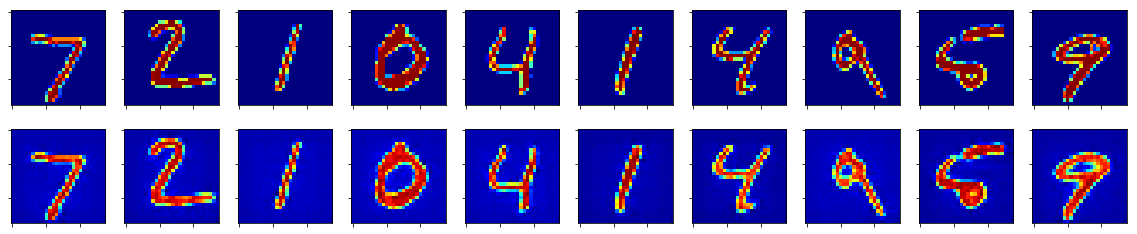

In [27]:
results = decoded_nr
f,a=plt.subplots(2,10,figsize=(20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)), cmap='jet')
    a[1][i].imshow(np.reshape(results[i],(28,28)), cmap='jet')
    a[0][i].set_xticklabels([])
    a[0][i].set_yticklabels([])
    a[1][i].set_xticklabels([])
    a[1][i].set_yticklabels([])

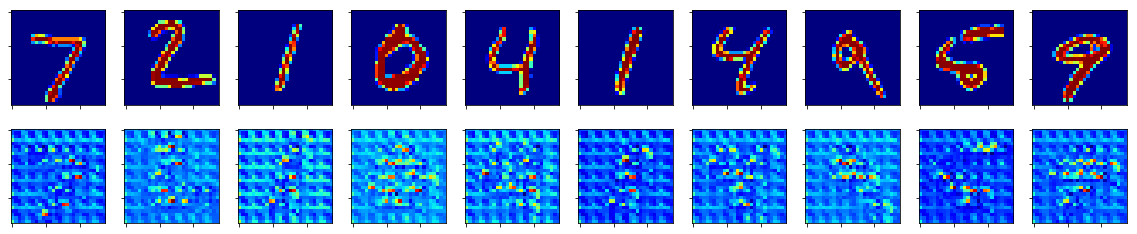

In [28]:
results = decoded_rt
f,a=plt.subplots(2,10,figsize=(20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)), cmap='jet')
    a[1][i].imshow(np.reshape(results[i],(28,28)), cmap='jet')
    a[0][i].set_xticklabels([])
    a[0][i].set_yticklabels([])
    a[1][i].set_xticklabels([])
    a[1][i].set_yticklabels([])

---------------
##### Case 1: Model that learns rotated images

Directories and loaded models

In [46]:
model_basedir="/home/tkurihana/clouds/metrics/output_model"
vanila_modeldir=model_basedir+'/61889242'
new_modeldir=model_basedir+'/62020087' # rotated train image

In [47]:
# CNN model
vmodel = load_cnn(vanila_modeldir, step=30) # vanila model
nmodel = load_cnn(new_modeldir, step=30)    # new model

In [49]:
# Autoencoder
oencoder = load_model( model_basedir+"/original2", step=5)
nencoder = load_model( model_basedir+"/62007917", step=11)

In [50]:
### data
# get test data
test_data = mnist.test.images
_otest = rotate_fn(test_data.reshape(-1,28,28,1))
_ntest = rotate_fn(test_data.reshape(-1,28,28,1))

# get labels
labels = mnist.test.labels

# get latent representaton for test data
otest  = oencoder.predict(_otest)
ntest  = nencoder.predict(_ntest)

# get probability/output of trained CNN
olabels = vmodel.predict(otest)
nlabels = nmodel.predict(ntest)

Accuracy

In [52]:
acc = accuracy_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in vanila encoder + CNN ".format(acc) )

Test Accuracy 0.5754 in vanila encoder + CNN 


In [53]:
nacc = accuracy_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in Rotate Loss encoder + CNN ".format(nacc) )

Test Accuracy 0.5817 in Rotate Loss encoder + CNN 


Precision

In [16]:
avps = precision_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='macro')

In [64]:
print("Test Avg. Precision {} in vanila encoder + CNN ".format(avps) )

Test Avg. Precision 0.5779 in vanila encoder + CNN 


In [85]:
print("Test Weighted. Precision {} in vanila encoder + CNN ".format(avps) )

Test Weighted. Precision 0.7600292722317866 in vanila encoder + CNN 


In [17]:
print("Test Macro Precision {} in vanila encoder + CNN ".format(avps) )

Test Macro Precision 0.5720451646422801 in vanila encoder + CNN 


In [18]:
navps = precision_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='macro')

In [65]:
print("Test Avg. Precision {} in Rotate Loss encoder + CNN ".format(navps) )

Test Avg. Precision 0.6039 in Rotate Loss encoder + CNN 


In [89]:
print("Test Weighted. Precision {} in Rotate Loss encoder + CNN ".format(navps) )

Test Weighted. Precision 0.8584712436963499 in Rotate Loss encoder + CNN 


In [19]:
print("Test Macro Precision {} in Rotate Loss encoder + CNN ".format(navps) )

Test Macro Precision 0.5985578007059396 in Rotate Loss encoder + CNN 


Recall

In [87]:
recalls = recall_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='micro')
print("Test Recall {} in vanila encoder + CNN ".format(recalls) )

Test Recall 0.5779 in vanila encoder + CNN 


In [35]:
recalls = recall_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Weighted Recall {} in vanila encoder + CNN ".format(recalls) )

Test Weighted Recall 0.4767160575358777 in vanila encoder + CNN 


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [67]:
nrecalls = recall_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='micro')
print("Test Recall {} in Rotate Loss encoder + CNN ".format(nrecalls) )

Test Recall 0.6039 in Rotate Loss encoder + CNN 


In [95]:
nrecalls = recall_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Recall {} in Rotate Loss encoder + CNN ".format(nrecalls) )

Test Recall 0.4601873901793976 in Rotate Loss encoder + CNN 


F score

In [54]:
fscore = f1_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in vanila encoder + CNN ".format(fscore) )

Test F1 0.5034510668516681 in vanila encoder + CNN 


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
fscore = f1_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='micro')
print("Test F1 {} in vanila encoder + CNN ".format(fscore) )

Test F1 0.5754 in vanila encoder + CNN 


In [56]:
nfscore = f1_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in Rotate Loss encoder + CNN ".format(nfscore) )

Test F1 0.48081666269837947 in Rotate Loss encoder + CNN 


In [57]:
nfscore = f1_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='micro')
print("Test F1 {} in Rotate Loss encoder + CNN ".format(nfscore) )

Test F1 0.5817 in Rotate Loss encoder + CNN 


###### Case2: Model that learns no-rotated image (original as mnist input)

In [58]:
model_basedir="/home/tkurihana/clouds/metrics/output_model"
vanila_nr_modeldir=model_basedir+'/61893579'
new_nr_modeldir=model_basedir+'/62018513'

In [59]:
# CNN model
vmodel_nr = load_cnn(vanila_nr_modeldir, step=30) # vanila model
nmodel_nr = load_cnn(new_nr_modeldir, step=30)    # new model

In [60]:
### data 
# get latent representaton for test data
#otest  = oencoder.predict(_otest)
#ntest  = nencoder.predict(_ntest)

# get probability/output of trained CNN
olabels_nr = vmodel_nr.predict(otest)
nlabels_nr = nmodel_nr.predict(ntest)

Accuracy

In [61]:
acc_nr = accuracy_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in vanila encoder + CNN without rotation ".format(acc_nr) )

Test Accuracy 0.3588 in vanila encoder + CNN without rotation 


In [62]:
nacc_nr = accuracy_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in Rotate Loss encoder + CNN wihtout rotation ".format(nacc_nr) )

Test Accuracy 0.3477 in Rotate Loss encoder + CNN wihtout rotation 


Precision

In [96]:
wps_nr = precision_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='weighted')
print("Test Weighted. Precision {} in vanila encoder + CNN without rotation  ".format(wps_nr) )

Test Weighted. Precision 0.340158135717332 in vanila encoder + CNN without rotation  


In [97]:
nwps_nr = precision_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='weighted')
print("Test Weighted. Precision {} in Rotate Loss encoder + CNN without rotation  ".format(nwps_nr) )

Test Weighted. Precision 0.4235300221519097 in Rotate Loss encoder + CNN without rotation  


In [25]:
wps_nr = precision_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='micro')
print("Test Weighted. Precision {} in vanila encoder + CNN without rotation  ".format(wps_nr) )

Test Weighted. Precision 0.3431 in vanila encoder + CNN without rotation  


In [33]:
wps_nr = precision_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Macro. Precision {} in vanila encoder + CNN without rotation  ".format(wps_nr) )

Test Macro. Precision 0.3417997209665859 in vanila encoder + CNN without rotation  


In [34]:
nwps_nr = precision_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Macro Precision {} in Rotate Loss encoder + CNN without rotation  ".format(nwps_nr) )

Test Macro Precision 0.3595254773941988 in Rotate Loss encoder + CNN without rotation  


Recall

In [36]:
recalls_nr = recall_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Weighted Recall {} in vanila encoder + CNN without rotation".format(recalls) )

Test Weighted Recall 0.4767160575358777 in vanila encoder + CNN without rotation


In [100]:
nrecalls_nr = recall_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test Weighted Recall {} in Rotate Loss encoder + CNN without rotation ".format(nrecalls_nr) )

Test Weighted Recall 0.36768632517776034 in Rotate Loss encoder + CNN without rotation 


F score

In [63]:
fscore_nr = f1_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in vanila encoder + CNN without rotation".format(fscore_nr) )

Test F1 0.361121634223341 in vanila encoder + CNN without rotation


In [82]:
fscore_nr = f1_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='weighted')
print("Test F1 {} in vanila encoder + CNN without rotation".format(fscore_nr) )

Test F1 0.3349459903967378 in vanila encoder + CNN without rotation


In [64]:
nfscore_nr = f1_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in Rotate Loss encoder + CNN without rotation".format(nfscore_nr) )

Test F1 0.35002620870814777 in Rotate Loss encoder + CNN without rotation


In [83]:
nfscore_nr = f1_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='weighted')
print("Test F1 {} in Rotate Loss encoder + CNN without rotation".format(nfscore_nr) )

Test F1 0.3714339609736793 in Rotate Loss encoder + CNN without rotation


------------------------
#### Baseline: Compare with no-rotated test data in inference
Use trained AEs and CNNs in case1 + case2, and then parse test data wihout any rotation from original input. (In all above experiment, I applied random rotation.)

In [65]:
### data
# get test data
test_data = mnist.test.images.reshape(-1,28,28,1)

# get labels
labels = mnist.test.labels

# get latent representaton for test data
otest  = oencoder.predict(test_data) # L2 
ntest  = nencoder.predict(test_data) # Rotate-invariant

In [66]:
# get probability/output of trained CNN with random rotation in training 
olabels = vmodel.predict(otest)
nlabels = nmodel.predict(ntest)

# get probability/output of trained CNN without random rotation in training 
olabels_nr = vmodel_nr.predict(otest)
nlabels_nr = nmodel_nr.predict(ntest)

###### Analysis

- Accuracy

In [67]:
acc_nr = accuracy_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in vanila encoder + CNN with rotation ".format(acc_nr) )

Test Accuracy 0.579 in vanila encoder + CNN with rotation 


In [68]:
acc_nr = accuracy_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in Rotate encoder + CNN with rotation ".format(acc_nr) )

Test Accuracy 0.608 in Rotate encoder + CNN with rotation 


In [69]:
acc_nr = accuracy_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in vanila encoder + CNN without rotation ".format(acc_nr) )

Test Accuracy 0.9557 in vanila encoder + CNN without rotation 


In [70]:
acc_nr = accuracy_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1))
print("Test Accuracy {} in Rotate encoder + CNN without rotation ".format(acc_nr) )

Test Accuracy 0.9445 in Rotate encoder + CNN without rotation 


- F1 Score

In [71]:
fscore = f1_score(np.argmax(olabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in vanila encoder + CNN with rotation".format(fscore) )

Test F1 0.5010960304591288 in vanila encoder + CNN with rotation


In [72]:
fscore = f1_score(np.argmax(nlabels, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in Rotate encoder + CNN with rotation".format(fscore) )

Test F1 0.5050620221554734 in Rotate encoder + CNN with rotation


In [73]:
fscore = f1_score(np.argmax(olabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in vanila encoder + CNN without rotation".format(fscore) )

Test F1 0.9552807699687594 in vanila encoder + CNN without rotation


In [74]:
fscore = f1_score(np.argmax(nlabels_nr, axis=-1), np.argmax(labels, axis=-1), average='macro')
print("Test F1 {} in Rotate encoder + CNN without rotation".format(fscore) )

Test F1 0.9437404526620595 in Rotate encoder + CNN without rotation


-----------------
### Check how rotation funciton work
check what kind of `angle` should user parse to `tf.contrib.image.rotate`

In [104]:
imgs  = mnist.train.images.reshape(-1,28,28,1)
rimgs = rotate_fn(imgs)

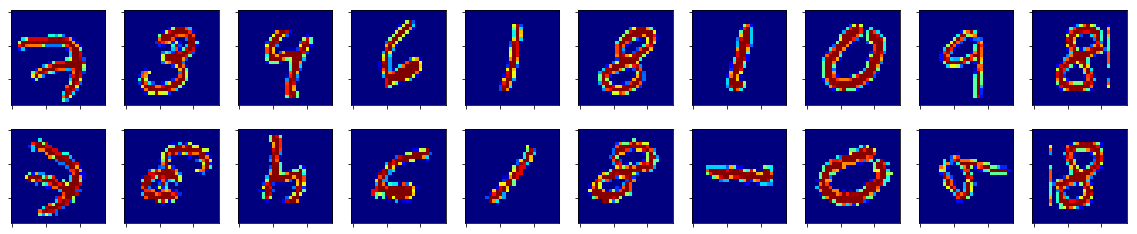

In [105]:
nimg = 10
fig, ax = plt.subplots(2,nimg, figsize=(20,4))
for i in range(nimg):
    ax[0][i].imshow(np.reshape(imgs[i], (28,28)), cmap='jet')
    ax[1][i].imshow(np.reshape(rimgs[i], (28,28)), cmap='jet')
    ax[0][i].set_xticklabels([])
    ax[0][i].set_yticklabels([])
    ax[1][i].set_xticklabels([])
    ax[1][i].set_yticklabels([])   
plt.show()

##### Note:
==> rotate function's `angle` option accepts 0-360 degree?

----------------
### 2. Evaluate prediction of each digit image with various rotation
Select one (or several) image(s) from each digit and rotates it(them). And see the predicited label as varying the rotational angles. 

###### Pre-requisite
import `rotate_fn` from classifier.py, and run `load_cnn` and `load_model` function in Task.1. Necessary to load MNIST data from line above. 

##### Goal
Observe how each model can accurately predict label of each digit image with various rotation

##### Experiment plan

|        Model / Digit     |        0         | ... |  9  |
| :-----------------------:|:---------------: | :--:| :-: |
|  L2 + CNN                | Angle from 0-359             |
|  RI + CNN                |                              |
|  L2 + CNN (Train: Rotate)|                              |
|  RI + CNN (Train: Rotate)|                              |

###### Contents
1. Accuracy and F1 score on overall angles
2. Heatmap (# of agnles row by 10 cols) & (Green: Right/ Red: Wrong)

- Task.2 Exp 1: Select one image and rotate it

Get Numbers from test images

In [12]:
# original data/labels
test_data   = mnist.test.images
test_labels = mnist.test.labels

In [33]:
#select random images with index
imgs_list   = []
for inum in range(10):
    idx_array = np.squeeze(np.argwhere(np.argmax(test_labels, axis=-1) == inum))
    np.random.shuffle(idx_array) # randomly shuffle index array
    imgs_list.append(test_data[idx_array[0]].reshape(28,28))
    print(" Digit {} | index = {}".format(inum, idx_array[0]) )

 Digit 0 | index = 4048
 Digit 1 | index = 8390
 Digit 2 | index = 5931
 Digit 3 | index = 3363
 Digit 4 | index = 275
 Digit 5 | index = 2540
 Digit 6 | index = 7970
 Digit 7 | index = 5179
 Digit 8 | index = 8258
 Digit 9 | index = 7697


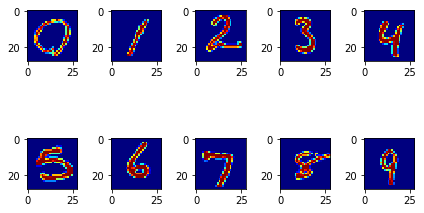

In [34]:
## plot selected images
fig = plt.figure()
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(imgs_list[i], cmap='jet')
fig.tight_layout()
plt.show()

In [35]:
def serialized_predict_rotate_label(data,encoder, cnn, dangle=2):
    """data: np.ndarray(28,28)
    """
    dangles_list = [i for i in range(0,360, dangle)]
    
    def _local_rotate_fn(img, angle):
        rimg_tf = tf.contrib.image.rotate(
            img.astype(np.float32), tf.constant(angle,dtype=tf.float32), interpolation='NEAREST'
        )
        sess = tf.Session()
        with sess.as_default():
            rimg = rimg_tf.eval()
        return rimg
    
    predicts  = []
    for iangle in dangles_list:
        rimg = _local_rotate_fn(data, iangle)
        latent_rimg  = encoder.predict(rimg.reshape(-1,28,28,1))
        label = cnn.predict(latent_rimg)
        predicts.append(np.argmax(label, axis=-1))
    
    return predicts, dangles_list

Dev: Speed up predict_rotate_label function

In [11]:
def _rot_fn(images, angles):
    rotated_tensor_images = tf.contrib.image.transform(
        images,
        tf.contrib.image.angles_to_projective_transforms(
            angles, tf.cast(tf.shape(images)[1], tf.float32),
            tf.cast(tf.shape(images)[2], tf.float32)
        )
    )
    return rotated_tensor_images

In [90]:
ncopy=10
timg = imgs_list[7]
copy_imgs_list = []
copy_imgs_list.append(timg.reshape(1,28,28))
for i in range(0,ncopy-1):
    copy_imgs_list.append(np.copy(timg.reshape(1,28,28)))
new_imgs_array = np.concatenate(copy_imgs_list, axis=0)

In [59]:
images = new_imgs_array.astype(np.float32)
random_angles = tf.random.uniform(
        shape = (tf.shape(images)[0], ),
        minval = 1,
        maxval = 359,
        dtype=tf.float32,
        seed = 0
    )
sess = tf.Session()
with sess.as_default():
    rangles = random_angles.eval()
rangles

array([ 37.108818, 348.3197  , 304.85757 ,  18.28471 ,  18.371258,
       279.3359  , 303.31955 , 150.31282 , 183.56511 , 235.5625  ],
      dtype=float32)

In [99]:
new_rimgs_tf = _rot_fn(new_imgs_array.astype(np.float32).reshape(-1,28,28,1), 
                       tf.constant([i*math.pi/180 for i in range(0,180,18)], dtype=tf.float32)) 

In [101]:
[i*math.pi/180 for i in range(0,180,18)]

[0.0,
 0.3141592653589793,
 0.6283185307179586,
 0.9424777960769379,
 1.2566370614359172,
 1.5707963267948966,
 1.8849555921538759,
 2.199114857512855,
 2.5132741228718345,
 2.827433388230814]

In [102]:
new_rimgs_tf.shape

TensorShape([Dimension(10), Dimension(28), Dimension(28), Dimension(1)])

In [103]:
sess = tf.Session()
with sess.as_default():
    new_rimgs = new_rimgs_tf.eval()

 -  Radian Version  
 Rsource [Stackoverflow : how to rotate an image for data augmentation?
](https://stackoverflow.com/questions/34801342/tensorflow-how-to-rotate-an-image-for-data-augmentation)

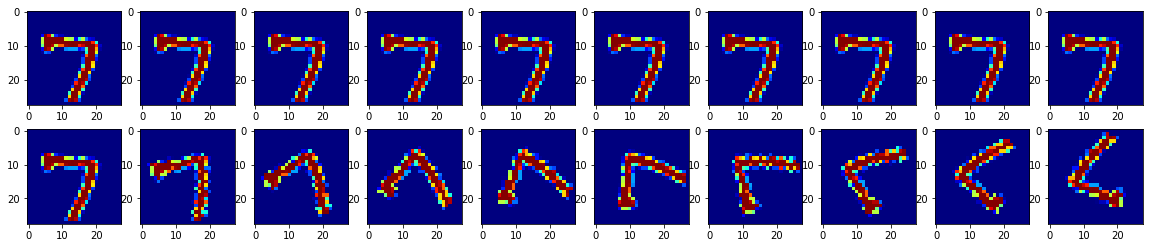

In [104]:
fig,ax=plt.subplots(2,10,figsize=(20,4))
for i in range(10):
    ax[0][i].imshow(new_imgs_array[i].reshape(28,28), cmap='jet')
    ax[1][i].imshow(new_rimgs[i].reshape(28,28), cmap='jet')

This is just a degree base...

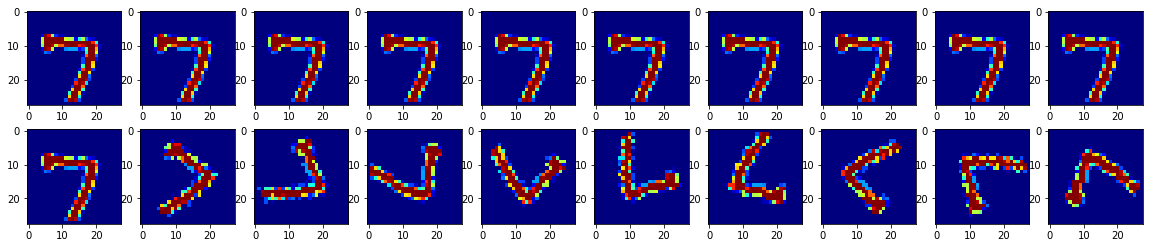

In [97]:
fig,ax=plt.subplots(2,10,figsize=(20,4))
for i in range(10):
    ax[0][i].imshow(new_imgs_array[i].reshape(28,28), cmap='jet')
    ax[1][i].imshow(new_rimgs[i].reshape(28,28), cmap='jet')

rotate image

In [105]:
def _rotate_fn(img, angle):
        rimg_tf = tf.contrib.image.rotate(
            img.astype(np.float32), tf.constant(angle,dtype=tf.float32), interpolation='NEAREST'
        )
        sess = tf.Session()
        with sess.as_default():
            rimg = rimg_tf.eval()
        return rimg

In [129]:
crimg = _rotate_fn(imgs_list[1], 180/180*math.pi)

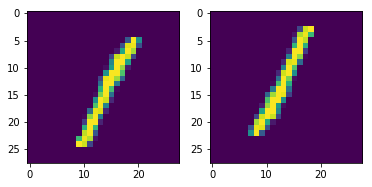

In [130]:
fig = plt.figure()
ax = plt.subplot(1,2,1)
plt.imshow(imgs_list[1].reshape(28,28))
ax = plt.subplot(1,2,2)
plt.imshow(crimg.reshape(28,28))
plt.show()

In [132]:
nrimgs_tf = _rotate_fn(new_imgs_array.astype(np.float32).reshape(-1,28,28,1), 
                       90*math.pi/180) 

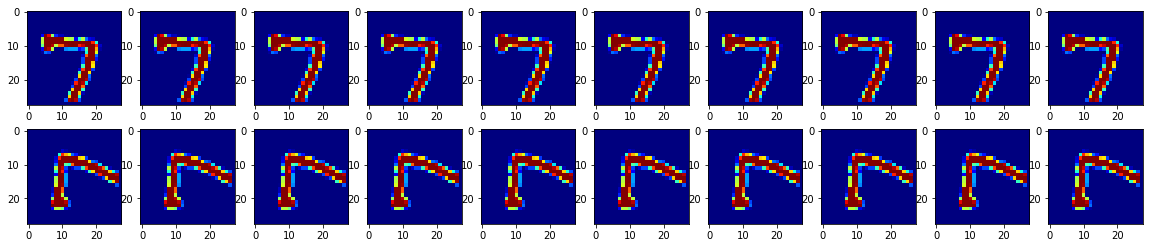

In [133]:
fig,ax=plt.subplots(2,10,figsize=(20,4))
for i in range(10):
    ax[0][i].imshow(new_imgs_array[i].reshape(28,28), cmap='jet')
    ax[1][i].imshow(nrimgs_tf[i].reshape(28,28), cmap='jet')

In [ ]:
def predict_rotate_label(data,encoder, cnn, dangle=2):
    """data: np.ndarray(28,28)
    """
    dangles_list = [i for i in range(0,360, dangle)]
    
    def _local_rotate_fn(img, angle):
        rimg_tf = tf.contrib.image.rotate(
            img.astype(np.float32), tf.constant(angle,dtype=tf.float32), interpolation='NEAREST'
        )
        sess = tf.Session()
        with sess.as_default():
            rimg = rimg_tf.eval()
        return rimg
    
    predicts  = []
    for iangle in dangles_list:
        rimg = _local_rotate_fn(data, iangle)
        latent_rimg  = encoder.predict(rimg.reshape(-1,28,28,1))
        label = cnn.predict(latent_rimg)
        predicts.append(np.argmax(label, axis=-1))
    
    return predicts, dangles_list

###### L2 + CNN without rotatin in training

In [25]:
#directory
model_basedir="/home/tkurihana/clouds/metrics/output_model"

# get Autoencoder
oencoder = load_model( model_basedir+"/original2", step=5)
#nencoder = load_model( model_basedir+"/61881099", step=30)

# get cnn model 
vanila_nr_modeldir=model_basedir+'/61893579'
#new_nr_modeldir=model_basedir+'/61893581'

cnn = load_cnn(vanila_nr_modeldir, step=30)

In [34]:
predicts_list = []
for inum in range(10):
    predicts, dangles_list = predict_rotate_label(imgs_list[inum], oencoder, cnn, dangle=15)
    predicts_list.append(predicts)
    print(" FINISH {}% ".format(int((inum+1)/10*100) ) )

 FINISH 10% 
 FINISH 20% 
 FINISH 30% 
 FINISH 40% 
 FINISH 50% 
 FINISH 60% 
 FINISH 70% 
 FINISH 80% 
 FINISH 90% 
 FINISH 100% 


In [47]:
### accuracy
acc_list = []
for inum in range(10):
    acc = accuracy_score(predicts_list[inum], np.array([ inum for i in range(len(predicts_list[inum]))]) )
    acc_list.append(acc)
    print("Digit {} | Test Accuracy {} in vanila encoder + CNN without rotation in training ".format(inum, round(acc,3) ) )

Digit 0 | Test Accuracy 0.875 in vanila encoder + CNN without rotation in training 
Digit 1 | Test Accuracy 0.667 in vanila encoder + CNN without rotation in training 
Digit 2 | Test Accuracy 0.292 in vanila encoder + CNN without rotation in training 
Digit 3 | Test Accuracy 0.333 in vanila encoder + CNN without rotation in training 
Digit 4 | Test Accuracy 0.708 in vanila encoder + CNN without rotation in training 
Digit 5 | Test Accuracy 0.458 in vanila encoder + CNN without rotation in training 
Digit 6 | Test Accuracy 0.292 in vanila encoder + CNN without rotation in training 
Digit 7 | Test Accuracy 0.125 in vanila encoder + CNN without rotation in training 
Digit 8 | Test Accuracy 0.292 in vanila encoder + CNN without rotation in training 
Digit 9 | Test Accuracy 0.25 in vanila encoder + CNN without rotation in training 


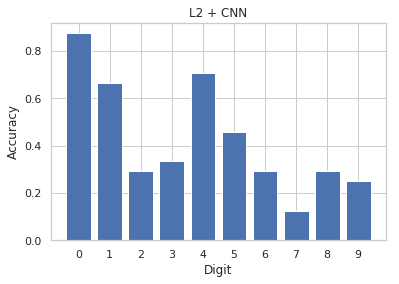

In [51]:
# set name
expname = 'L2 + CNN'
# set background
sns.set(style="whitegrid", color_codes=True)
# plot
plt.figure()
plt.bar([i for i in range(10)], acc_list, 
        tick_label=[ str(i) for i in range(10)], align="center")
plt.title("{}".format(expname))
plt.ylabel("Accuracy")
plt.xlabel("Digit")
plt.show()

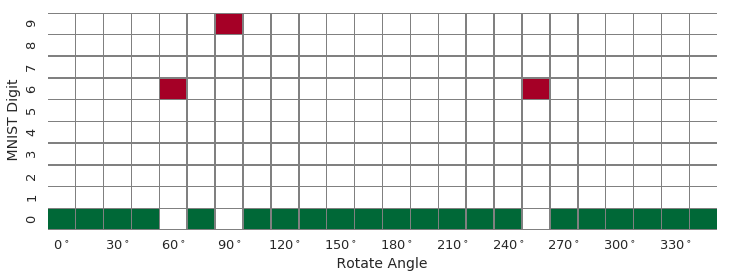

In [134]:
### heatmap
for inum in range(0,1,1):
    tmp_plist = predicts_list[inum]
    table_array = np.zeros((10, len(tmp_plist))).astype(float)
    table_array[:,:] = np.nan
    item = 0
    for idx, idigit in enumerate(tmp_plist):
        if idigit[0] == inum:
            number = 10.00
        else:
            number = -10.00
        dnum = int(idigit[0])
        table_array[dnum, int(idx)] = number 
    
    fig = plt.figure(figsize=(12,4))
    #plt.imshow(table_array, cmap='RdYlGn')
    sns.heatmap(table_array, center=0,cmap='RdYlGn',linewidths=.5,linecolor='gray',cbar=False)
    plt.gca().invert_yaxis()
    plt.xticks([x+0.5 for x in range(0,len(tmp_plist),2)],
               [r'${}^\circ$'.format(dangles_list[i]) for i in range(0,len(dangles_list), 2)], fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel(" MNIST Digit", fontsize=14)
    plt.xlabel(" Rotate Angle ", fontsize=14)